# Assignment 1


In [1]:
import numpy as np
np.random.seed(13) #TODO Check if this is used for sgd
import keras.backend as K
from keras.models import Sequential
from keras.layers import Dense, Embedding, Reshape, Lambda
from keras.utils import np_utils
from keras.utils.data_utils import get_file
from keras.preprocessing.text import Tokenizer
from keras.utils.vis_utils import model_to_dot
from keras.preprocessing import sequence
from gensim.models import KeyedVectors
from sklearn.manifold import TSNE
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.neighbors import NearestNeighbors as nn
from matplotlib import pylab
from __future__ import division

Using TensorFlow backend.
C:\Users\Thijs\Anaconda3\envs\Python35\lib\site-packages\gensim\utils.py:1167: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [2]:
# DO NOT Modify the lines in this cell
path = 'alice.txt'
corpus = open(path).readlines()[0:700]

corpus = [sentence for sentence in corpus if sentence.count(" ") >= 2]

tokenizer = Tokenizer(filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n'+"'")
tokenizer.fit_on_texts(corpus)
corpus = tokenizer.texts_to_sequences(corpus)
nb_samples = sum(len(s) for s in corpus)
V = len(tokenizer.word_index) + 1

# Is this something they need to change?
dim = 100
window_size = 2 #use this window size for Skipgram, CBOW, and the model with the additional hidden layer
window_size_corpus = 4 #use this window size for the co-occurrence matrix

## Question 1

### Co-occurrence Matrix
Use the provided code to load the "Alice in Wonderland" text document. 
1. Implement the word-word co-occurrence matrix for “Alice in Wonderland”
2. Normalize the words such that every value lies within a range of 0 and 1
3. Compute the cosine distance between the given words:
    - Alice 
    - Dinah
    - Rabbit
4. List the 5 closest words to 'Alice'. Discuss the results.
5. Discuss what the main drawbacks are of a term-term co-occurence matrix solutions?


In [3]:
#create co-occurrence matrix
#print(tokenizer)
#print(corpus)
#print(nb_samples)
#print(V)
#print("\n")

def create_co_occurrence(crps, win_size, voc_size):
    # Discuss -1 with Thijs
    co_occurrence_mat = np.zeros((voc_size-1,voc_size-1), int)
    for sentence in crps:
        # Sliding window inside of sentence
        for i, center_word in enumerate(sentence):
            i_min = max(0, i - win_size + 1)
            i_max = min(len(sentence), i + win_size)
            window = sentence[i_min: i_max]
            #print("Window:", window)
            
            # Increment co occurence of words in sliding window
            for j in range(i_min, i_max):
                if i != j:
                    co_word = sentence[j]
                    co_occurrence_mat[center_word-1, co_word-1] += 1
    
    np.amax(co_occurrence_mat)
    
    return co_occurrence_mat

co_occurence = create_co_occurrence(corpus, window_size, V)

#Normalize
co_occurence = co_occurence / np.amax(co_occurence)
co_occurence

array([[ 0.        ,  0.44444444,  0.48148148, ...,  0.03703704,
         0.        ,  0.        ],
       [ 0.44444444,  0.        ,  0.07407407, ...,  0.03703704,
         0.        ,  0.        ],
       [ 0.48148148,  0.07407407,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ..., 
       [ 0.03703704,  0.03703704,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [12]:
#find cosine similarity to Alice, Dinah and Rabbit
from scipy import spatial
print(tokenizer.word_index)

def cosine_sim(word_1, word_2, tknzr, matrix):
    word_1_ind = tknzr.word_index[word_1]
    word_2_ind = tknzr.word_index[word_2]
    
    #print(word_1, word_1_ind)
    #print(word_2, word_2_ind)
    
    word_1_vec = matrix[:,word_1_ind-1]
    word_2_vec = matrix[:,word_2_ind-1]
    
    #print(word_1_vec)
    #print(word_2_vec)
    
    similarity = 1 - spatial.distance.cosine(word_1_vec, word_2_vec)
    #print(similarity)
    
    return similarity
    
    
print('similarity of Alice and Dinah', str(cosine_sim("alice", "dinah", tokenizer, co_occurence)))
print('similarity of Alice and Rabbit', str(cosine_sim("alice", "rabbit", tokenizer, co_occurence)))
print('similarity of Dinah and Rabbit', str(cosine_sim("dinah", "rabbit", tokenizer, co_occurence)))


{'eagerly': 371, 'asked': 1050, 'thing': 89, 'make': 212, 'please': 217, 'australia': 645, 'house': 156, 'piece': 1059, 'seemed': 113, 'grow': 480, 'first': 104, 'worse': 879, 'direction': 1162, 'fall': 257, 'live': 862, 'candle': 347, 'their': 180, 'gravely': 1061, 'cold': 984, 'paused': 1033, 'hide': 1031, 'picking': 593, 'suddenly': 175, 'capital': 284, 'fountains': 693, 'how': 38, 'dears': 487, 'est': 918, 'waters': 849, 'might': 161, 'speed': 878, 'yourself': 494, 'ate': 770, 'head': 189, 'say': 83, 'five': 828, 'hurriedly': 1011, 'met': 1087, 'pictures': 246, 'deal': 357, 'theirs': 1077, 'were': 65, 'important': 986, 'bend': 1101, 'dream': 657, 'sort': 179, 'ferrets': 578, 'skurried': 816, 'leave': 472, 'chapter': 242, 'northumbria': 556, 'trial': 571, 'swim': 1156, 'called': 199, 'mouse': 25, 'play': 865, 'knot': 1103, 'french': 531, 'dinah': 87, 'field': 604, 'toys': 864, 'ever': 119, 'hopeless': 801, 'w': 1170, 'dark': 305, 'shedding': 803, 'hippopotamus': 906, 'oh': 51, 'look

In [169]:
#find the closest words to Alice
import pandas as pd

similarities = {i: cosine_sim("alice", i, tokenizer, co_occurence) if "alice"!= i else 0.0 for i in tokenizer.word_index}
pd_similarities = pd.DataFrame(list(similarities.items()), columns=['Word', 'Sim'])

top_5 = pd_similarities.sort_values(['Sim'], ascending=False)[:5]

print("Most similar word:\n", top_5)
#print(similarities)


Most similar word:
        Word       Sim
511     ugh  0.570483
754    ahem  0.570483
354     she  0.533538
105     say  0.530232
75   listen  0.498760


C:\Users\Thijs\Anaconda3\envs\Python35\lib\site-packages\scipy\spatial\distance.py:644: RuntimeWarning: invalid value encountered in double_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)


Discussion of the drawbacks:

One of the major drawbacks of a co-occurence matrix is the fact that the matrix becomes very large in a very short time. In order to compute answers from it one would need a very strong machine. Ofcourse this is doable however, there are more efficient ways to calculate it. Another drawback of using a co-occurence matrix is that quite some memory is needed to be able to store it all in memory. Of course this can be optimalized but still it is quite costly. 

In [148]:
#Save your all the vector representations of your word embeddings in this way
#Change when necessary the sizes of the vocabulary/embedding dimension

f = open('vectors_co_occurrence.txt',"w")
f.write(" ".join([str(V-1),str(V-1)]))
f.write("\n")

#vectors = your word co-occurrence matrix
vectors = co_occurence
for word, i in tokenizer.word_index.items():
    f.write(word)
    f.write(" ")
    f.write(" ".join(map(str, list(vectors[i-1,:]))))
    f.write("\n")
f.close()

In [149]:
#reopen your file as follows

co_occurrence = KeyedVectors.load_word2vec_format('./vectors_co_occurrence.txt', binary=False)

## Question 2

### Word embeddings
Build embeddings with a keras implementation where the embedding vector is of length 50, 150 and 300. Use the Alice in Wonderland text book for training.
1. Using the CBOW model
2. Using Skipgram model
3. Add extra hidden dense layer to CBow and Skipgram implementations. Choose an activation function for that layer and justify your answer.
4. Analyze the four different word embeddings
    - Implement your own function to perform the analogy task with. Do not use existing libraries for this task such as Gensim. Your function should be able to answer whether an anaology as in the example given in the pdf-file is true.
    - Compare the performance on the analogy task between the word embeddings that you have trained in 2.1, 2.2 and 2.3.  
    - Visualize your results and interpret your results
5. Use the word co-occurence matrix from Question 1. Compare the performance on the analogy task with the performance of your trained word embeddings.  
6. Discuss:
    - What are the main advantages of CBOW and Skipgram?
    - What is the advantage of negative sampling?
    - What are the main drawbacks of CBOW and Skipgram?
7. Load pre-trained embeddings on large corpuses (see the pdf file). You only have to consider the word embeddings with an embedding size of 300
    - Compare performance on the analogy task with your own trained embeddings from "Alice in Wonderland". You can limit yourself to the vocabulary of Alice in Wonderland. Visualize the pre-trained word embeddings and compare these with the results of your own trained word embeddings. 


In [19]:
def generate_data_cbow(corpus, window_size, V):
    maxlen = window_size*2
    for words in corpus:
        L = len(words)
        for index, word in enumerate(words):
            contexts = []
            labels   = []            
            s = index - window_size
            e = index + window_size + 1
            
            contexts.append([words[i] for i in range(s, e) if 0 <= i < L and i != index])
            labels.append(word)

            x = sequence.pad_sequences(contexts, maxlen=maxlen)
            y = np_utils.to_categorical(labels, V)
            yield (x, y)

In [20]:
cbow = Sequential()
cbow.add(Embedding(input_dim=V, output_dim=dim, input_length=window_size*2))
cbow.add(Lambda(lambda x: K.mean(x, axis=1), output_shape=(dim,)))
cbow.add(Dense(V, activation='softmax'))

In [21]:
cbow.compile(loss='categorical_crossentropy', optimizer='adadelta')

In [22]:
for ite in range(10):
    loss = 0.
    for x, y in generate_data_cbow(corpus, window_size, V):
        loss += cbow.train_on_batch(x, y)

    print(ite, loss)

0 42308.2811444
1 38594.1970193
2 38767.0419376
3 38867.8861338
4 38929.3537067
5 38976.922761
6 38995.6720477
7 39014.251945
8 39044.3008515
9 39080.0715766


In [24]:
cbow.save('cbow_simple.h5')

In [26]:
def generate_data_skipgram(corpus, window_size, V):
    maxlen = window_size*2
    all_in = []
    all_out = []
    for words in corpus:
        L = len(words)
        for index, word in enumerate(words):
            p = index - window_size
            n = index + window_size + 1
                    
            in_words = []
            labels = []
            for i in range(p, n):
                if i != index and 0 <= i < L:
                    in_words.append([word])
                    labels.append(words[i])
            if in_words != []:
                all_in.append(np.array(in_words,dtype=np.int32))
                all_out.append(np_utils.to_categorical(labels, V))
    return (all_in,all_out)

In [27]:
#get x and y's for data
x,y = generate_data_skipgram(corpus,window_size,V)#save the preprocessed data of Skipgram


In [28]:
f = open('data_skipgram.txt' ,'w')

for input,outcome  in zip(x,y):
    input = np.concatenate(input)
    f.write(" ".join(map(str, list(input))))
    f.write(",")
    outcome = np.concatenate(outcome)
    f.write(" ".join(map(str,list(outcome))))
    f.write("\n")
f.close()

In [29]:
#load the preprocessed Skipgram data
def generate_data_skipgram_from_file():
    f = open('data_skipgram.txt' ,'r')
    for row in f:
        inputs,outputs = row.split(",")
        inputs = np.fromstring(inputs, dtype=int, sep=' ')
        inputs = np.asarray(np.split(inputs, len(inputs)))
        outputs = np.fromstring(outputs, dtype=float, sep=' ')
        outputs = np.asarray(np.split(outputs, len(inputs)))
        yield (inputs,outputs)

In [30]:
skipgram = Sequential()
skipgram.add(Embedding(input_dim=V, output_dim=dim, embeddings_initializer='glorot_uniform', input_length=1))
skipgram.add(Reshape((dim, )))
skipgram.add(Dense(input_dim=dim, units=V, kernel_initializer='uniform', activation='softmax'))

In [31]:
skipgram.compile(loss='categorical_crossentropy', optimizer='adadelta')

In [32]:
for ite in range(10):
    loss = 0.
    for x, y in generate_data_skipgram_from_file():
        loss += skipgram.train_on_batch(x, y)

    print(ite, loss)

0 42008.0517182
1 38353.1881878
2 38921.1881423
3 39330.0949223
4 39505.6043484
5 39678.1267002
6 39847.5325572
7 40026.978894
8 40211.2500122
9 40398.6335881


In [34]:
skipgram.save('skipgram_simple.h5')

## Activation for the dense layer

As can be seen below we tried several different activation functions as an extra dense layer. After some research online we decided that at least we wanted to test both ELU and ReLU as activation functions. Apart from these two functions we also wanted to try one else which became Sigmoid. Since ELU and ReLU both are quite good with dealing with vanishing gradients we felt like we needed another layer which strong point was not dealing with the vanishing gradient. Even though Sigmoid and Softmax show similarities we wanted to at least try it to make sure that indeed it would not be the best solution. And as can be seen below it indeed was not the best choice as a second dense layer. 

Because we did not know which one would perform best we decided that we would try all three. We put the activation layers in before the Softmax layer since Softmax is usually used as the last layer in the hidden layers of a neural network. This because Softmax normalizes the results while minimizing the cross-entropy/negative likelihood between the predictions and the actual outcome. 

In [5]:
#create CBOW model with additional dense layer        
dcbow = Sequential()
dcbow.add(Embedding(input_dim=V, output_dim=dim, input_length=window_size*2))
dcbow.add(Lambda(lambda x: K.mean(x, axis=1), output_shape=(dim,)))
dcbow.add(Dense(V, activation='elu'))
#dcbow.add(Dense(V, activation='sigmoid'))
#dcbow.add(Dense(V, activation='relu'))
dcbow.add(Dense(V, activation='softmax'))



Instructions for updating:
keep_dims is deprecated, use keepdims instead


In [62]:
#define loss function for CBOW + dense
dcbow.compile(loss='categorical_crossentropy', optimizer='adadelta')

In [65]:
#train model for CBOW + dense elu activation
for ite in range(10):
    loss = 0.
    for x, y in generate_data_cbow(corpus, window_size, V):
        loss += dcbow.train_on_batch(x, y)

    print(ite, loss)

0 39850.4765533


KeyboardInterrupt: 

In [25]:
dcbow.save('dcbow_elu.h5')

In [30]:
#train model for CBOW + dense sigmoid activation
for ite in range(10):
    loss = 0.
    for x, y in generate_data_cbow(corpus, window_size, V):
        loss += dcbow.train_on_batch(x, y)

    print(ite, loss)

0 42573.9224706
1 40779.2916886
2 40212.4141967
3 40963.4117401
4 42315.4382861
5 43557.8121278
6 44557.614516
7 45347.3085792
8 45826.0357494
9 45717.4792516


In [31]:
dcbow.save('dcbow_Sigmoid.h5')

In [34]:
for ite in range(10):
    loss = 0.
    for x, y in generate_data_cbow(corpus, window_size, V):
        loss += dcbow.train_on_batch(x, y)

    print(ite, loss)

0 40066.6369147
1 38122.0871696
2 37527.2364669
3 37265.8932388
4 37098.9213078
5 36907.566846
6 36689.9979763
7 36465.4231402
8 36250.071865
9 36031.9165194


In [35]:
dcbow.save('dcbow_Relu.h5')

In [9]:
#create Skipgram with additional dense layer
dskipgram = Sequential()
dskipgram.add(Embedding(input_dim=V, output_dim=dim, embeddings_initializer='glorot_uniform', input_length=1))
dskipgram.add(Reshape((dim, )))
dskipgram.add(Dense(input_dim=dim, units=V, kernel_initializer='uniform', activation='elu'))
dskipgram.add(Dense(input_dim=dim, units=V, kernel_initializer='uniform', activation='softmax'))


In [10]:
#define loss function for Skipgram + dense
dskipgram.compile(loss='categorical_crossentropy', optimizer='adadelta')

Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead


In [11]:
#train model for Skipgram + dense
for ite in range(10):
    loss = 0.
    for x, y in generate_data_skipgram_from_file():
        loss += dskipgram.train_on_batch(x, y)

    print(ite, loss)

0 39171.4094963
1 37593.4716475
2 37049.7866344
3 36863.5996245
4 36989.3757836
5 37082.103549
6 37015.1577585
7 36882.7768184
8 36745.6724875
9 36615.3105249


In [12]:
dskipgram.save('dskipgram_elu.h5')

In [13]:
#create Skipgram with additional dense layer
dskipgram = Sequential()
dskipgram.add(Embedding(input_dim=V, output_dim=dim, embeddings_initializer='glorot_uniform', input_length=1))
dskipgram.add(Reshape((dim, )))
dskipgram.add(Dense(input_dim=dim, units=V, kernel_initializer='uniform', activation='sigmoid'))
dskipgram.add(Dense(input_dim=dim, units=V, kernel_initializer='uniform', activation='softmax'))

In [14]:
#define loss function for Skipgram + dense
dskipgram.compile(loss='categorical_crossentropy', optimizer='adadelta')

In [15]:
#train model for Skipgram + dense
for ite in range(10):
    loss = 0.
    for x, y in generate_data_skipgram_from_file():
        loss += dskipgram.train_on_batch(x, y)

    print(ite, loss)

0 39699.7591234
1 39342.0153301
2 39097.7367924
3 38975.9978857
4 39085.1981041
5 39359.1998932
6 39351.1995022
7 39203.5751615
8 39015.3584349
9 38764.1542244


In [19]:
dskipgram.save('dskipgram_sigmoid.h5')

In [20]:
#create Skipgram with additional dense layer
dskipgram = Sequential()
dskipgram.add(Embedding(input_dim=V, output_dim=dim, embeddings_initializer='glorot_uniform', input_length=1))
dskipgram.add(Reshape((dim, )))
dskipgram.add(Dense(input_dim=dim, units=V, kernel_initializer='uniform', activation='relu'))
dskipgram.add(Dense(input_dim=dim, units=V, kernel_initializer='uniform', activation='softmax'))

In [21]:
#define loss function for Skipgram + dense
dskipgram.compile(loss='categorical_crossentropy', optimizer='adadelta')

In [22]:
#train model for Skipgram + dense
for ite in range(10):
    loss = 0.
    for x, y in generate_data_skipgram_from_file():
        loss += dskipgram.train_on_batch(x, y)

    print(ite, loss)

0 39437.579227
1 38211.8743823
2 37820.7792289
3 37606.3476986
4 37546.8119706
5 37517.1473264
6 37465.703705
7 37408.8727797
8 37353.1536354
9 37295.5879925


In [23]:
dskipgram.save('dskipgram_Relu.h5')

In [37]:
from sklearn.metrics.pairwise import cosine_similarity
path_anal = 'Data/analogy_alice.txt'
corpus_anal = open(path_anal).readlines()[0:47]

from copy import deepcopy

corpus_anal = [sentence for sentence in corpus_anal if sentence.count(" ") >= 2]
corpus_anal = [sentence.split() for sentence in corpus_anal]
corpus_anal_words = deepcopy(corpus_anal)
weights = co_occurence

def analogy(weights, corpus_anal):
    for i, sentence in enumerate(corpus_anal):
            for j in range(len(sentence)):
                try:
                    sentence[j] = tokenizer.word_index[sentence[j]]
                except:
                    #print("One or more words not in vocabulary")
                    pass
            if type(sentence[0]) == type(sentence[1]) == type(sentence[2]) == type(sentence[3]) == int:
                co_occurence_output = weights[sentence[0]-1] - weights[sentence[1]-1] + weights[sentence[2]-1]
                ground_truth = weights[sentence[3]-1]
                similarity = 1 - spatial.distance.cosine(co_occurence_output, ground_truth)
                #print(corpus_anal_words[i], similarity)
                if(similarity > 0.1):
                    print(corpus_anal_words[i], True)
                else:
                    print(corpus_anal_words[i], False)
            # bereken cosine

    #print(corpus_anal)

analogy(weights, corpus_anal)

['sudden', 'suddenly', 'usual', 'usually'] False
['bad', 'worse', 'good', 'better'] False
['go', 'going', 'look', 'looking'] True
['he', 'she', 'his', 'her'] False
['brother', 'sister', 'his', 'her'] False
['listen', 'listening', 'look', 'looking'] True
['saying', 'said', 'thinking', 'thought'] False
['bird', 'birds', 'cat', 'cats'] False
['good', 'better', 'old', 'older'] False
['good', 'better', 'quick', 'quicker'] False
['large', 'largest', 'good', 'best'] False
['falling', 'fell', 'knowing', 'knew'] False
['walk', 'walking', 'think', 'thinking'] False
['child', 'children', 'cat', 'cats'] False
['dog', 'dogs', 'eye', 'eyes'] True
['hand', 'hands', 'rat', 'rats'] False
['eat', 'eats', 'find', 'finds'] False
['find', 'finds', 'say', 'says'] True
['old', 'older', 'good', 'better'] False
['large', 'larger', 'quick', 'quicker'] False
['go', 'going', 'listen', 'listening'] False
['run', 'running', 'walk', 'walking'] False
['run', 'running', 'think', 'thinking'] False
['say', 'saying', 'si

In [39]:
from keras.models import load_model
model = load_model('dcbow_elu.h5')
weights = model.layers[0].get_weights()[0]

analogy(weights, corpus_anal)


['sudden', 'suddenly', 'usual', 'usually'] False
['bad', 'worse', 'good', 'better'] False
['go', 'going', 'look', 'looking'] True
['he', 'she', 'his', 'her'] False
['brother', 'sister', 'his', 'her'] True
['listen', 'listening', 'look', 'looking'] True
['saying', 'said', 'thinking', 'thought'] False
['bird', 'birds', 'cat', 'cats'] True
['good', 'better', 'old', 'older'] False
['good', 'better', 'quick', 'quicker'] False
['large', 'largest', 'good', 'best'] True
['falling', 'fell', 'knowing', 'knew'] False
['walk', 'walking', 'think', 'thinking'] False
['child', 'children', 'cat', 'cats'] True
['dog', 'dogs', 'eye', 'eyes'] False
['hand', 'hands', 'rat', 'rats'] False
['eat', 'eats', 'find', 'finds'] False
['find', 'finds', 'say', 'says'] False
['old', 'older', 'good', 'better'] False
['large', 'larger', 'quick', 'quicker'] False
['go', 'going', 'listen', 'listening'] False
['run', 'running', 'walk', 'walking'] False
['run', 'running', 'think', 'thinking'] False
['say', 'saying', 'sit'

In [40]:
from keras.models import load_model
model = load_model('dskipgram_elu.h5')
weights = model.layers[0].get_weights()[0]

analogy(weights, corpus_anal)


['sudden', 'suddenly', 'usual', 'usually'] False
['bad', 'worse', 'good', 'better'] False
['go', 'going', 'look', 'looking'] True
['he', 'she', 'his', 'her'] False
['brother', 'sister', 'his', 'her'] False
['listen', 'listening', 'look', 'looking'] False
['saying', 'said', 'thinking', 'thought'] False
['bird', 'birds', 'cat', 'cats'] False
['good', 'better', 'old', 'older'] True
['good', 'better', 'quick', 'quicker'] False
['large', 'largest', 'good', 'best'] False
['falling', 'fell', 'knowing', 'knew'] False
['walk', 'walking', 'think', 'thinking'] False
['child', 'children', 'cat', 'cats'] True
['dog', 'dogs', 'eye', 'eyes'] False
['hand', 'hands', 'rat', 'rats'] True
['eat', 'eats', 'find', 'finds'] False
['find', 'finds', 'say', 'says'] False
['old', 'older', 'good', 'better'] False
['large', 'larger', 'quick', 'quicker'] False
['go', 'going', 'listen', 'listening'] False
['run', 'running', 'walk', 'walking'] False
['run', 'running', 'think', 'thinking'] False
['say', 'saying', 'si

In [41]:
from keras.models import load_model
model = load_model('cbow_simple.h5')
weights = model.layers[0].get_weights()[0]

analogy(weights, corpus_anal)

['sudden', 'suddenly', 'usual', 'usually'] False
['bad', 'worse', 'good', 'better'] False
['go', 'going', 'look', 'looking'] True
['he', 'she', 'his', 'her'] False
['brother', 'sister', 'his', 'her'] True
['listen', 'listening', 'look', 'looking'] True
['saying', 'said', 'thinking', 'thought'] False
['bird', 'birds', 'cat', 'cats'] True
['good', 'better', 'old', 'older'] False
['good', 'better', 'quick', 'quicker'] False
['large', 'largest', 'good', 'best'] True
['falling', 'fell', 'knowing', 'knew'] False
['walk', 'walking', 'think', 'thinking'] False
['child', 'children', 'cat', 'cats'] True
['dog', 'dogs', 'eye', 'eyes'] False
['hand', 'hands', 'rat', 'rats'] False
['eat', 'eats', 'find', 'finds'] False
['find', 'finds', 'say', 'says'] False
['old', 'older', 'good', 'better'] False
['large', 'larger', 'quick', 'quicker'] False
['go', 'going', 'listen', 'listening'] False
['run', 'running', 'walk', 'walking'] False
['run', 'running', 'think', 'thinking'] False
['say', 'saying', 'sit'

In [42]:
from keras.models import load_model
model = load_model('skipgram_simple.h5')
weights = model.layers[0].get_weights()[0]

analogy(weights, corpus_anal)

['sudden', 'suddenly', 'usual', 'usually'] False
['bad', 'worse', 'good', 'better'] False
['go', 'going', 'look', 'looking'] True
['he', 'she', 'his', 'her'] False
['brother', 'sister', 'his', 'her'] True
['listen', 'listening', 'look', 'looking'] True
['saying', 'said', 'thinking', 'thought'] False
['bird', 'birds', 'cat', 'cats'] True
['good', 'better', 'old', 'older'] False
['good', 'better', 'quick', 'quicker'] False
['large', 'largest', 'good', 'best'] True
['falling', 'fell', 'knowing', 'knew'] False
['walk', 'walking', 'think', 'thinking'] False
['child', 'children', 'cat', 'cats'] True
['dog', 'dogs', 'eye', 'eyes'] False
['hand', 'hands', 'rat', 'rats'] False
['eat', 'eats', 'find', 'finds'] True
['find', 'finds', 'say', 'says'] True
['old', 'older', 'good', 'better'] False
['large', 'larger', 'quick', 'quicker'] True
['go', 'going', 'listen', 'listening'] False
['run', 'running', 'walk', 'walking'] False
['run', 'running', 'think', 'thinking'] False
['say', 'saying', 'sit', '

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 1182 samples in 0.040s...
[t-SNE] Computed neighbors for 1182 samples in 2.872s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1182
[t-SNE] Computed conditional probabilities for sample 1182 / 1182
[t-SNE] Mean sigma: 0.025614
[t-SNE] KL divergence after 250 iterations with early exaggeration: 95.183945
[t-SNE] Error after 1000 iterations: 1.535138


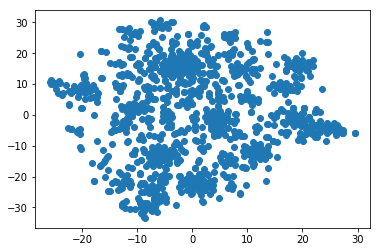

In [44]:
#Visualization results trained word embeddings

from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
def visualize(weights):
    n_sne = 1000
    tsne = TSNE(verbose=1)
    tsne_results = tsne.fit_transform(weights)

    df_tsne = {}
    df_tsne['x-tsne'] = tsne_results[:,0]
    df_tsne['y-tsne'] = tsne_results[:,1]
    %matplotlib inline

    plt.scatter(df_tsne['x-tsne'], df_tsne['y-tsne'])

visualize(co_occurence[:])


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 1183 samples in 0.004s...
[t-SNE] Computed neighbors for 1183 samples in 0.281s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1183
[t-SNE] Computed conditional probabilities for sample 1183 / 1183
[t-SNE] Mean sigma: 0.109482
[t-SNE] KL divergence after 250 iterations with early exaggeration: 82.976036
[t-SNE] Error after 1000 iterations: 2.740622


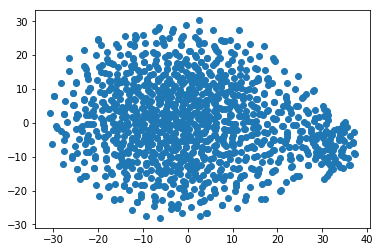

In [53]:
from keras.models import load_model
model = load_model('skipgram_simple.h5')
weights = model.layers[0].get_weights()[0]

visualize(weights)

Interpretation results of the visualization

## Compare the results of the trained word embeddings with the word-word co-occurrence matrix:

Comparison performance:

In the results above you can see that looking at the the different methods we do find some correlation. It can be seen that there are only two collection of words on which all models agree that they are similar. That are the combinations of ['go', 'going', 'look', 'looking'] and ['listen', 'listening', 'look', 'looking']. What is curious is that in both examples the words look and looking are present. 

Apart from that it is noticable that our own analogy perfoms like the CBOW and Skipgram models with only one dense level. There are some collection of words on which it only agrees with one of the two models or non of the two models. But in general our own analogy agrees more with the one dense function CBOW and Skipgram agree more than compared to the extra dense CBOW and Skipgram model. 

However, it it worth mentioning that the extra dense models tend to agree with eachother meaning that if one evaluates to true the other also evaluates to true. This might be due to the fact that the same activation functions have been used.

Finally it is important to mention that we used hardcoded values to determine whether a collection of words evaluates to true or false within a specific model. It could be improved by using the nearest neighbour of the outcomming vector and compare that to the vector of the word which we expect it to be. We expect this method to result in more reliable results than hardcoding the values.

## Discussion of the advantages of CBOW and Skipgram 

## Discussion of the advantages of negative sampling

## Discussion of the drawbacks of CBOW and Skipgram

In [49]:
#load pretrained word embeddings of word2vec

path_word2vec = "Data/GoogleNews-vectors-negative300.bin"

word2vec = KeyedVectors.load_word2vec_format(path_word2vec, binary=True)

FileNotFoundError: [Errno 2] No such file or directory: 'your path /GoogleNews-vectors-negative300.bin'

In [54]:
from gensim.scripts import glove2word2vec
#load pretraind word embeddings of Glove

path = "data/glove.6B/glove.6B.300d.txt"

#convert GloVe into word2vec format
gensim.scripts.glove2word2vec.get_glove_info(path)
gensim.scripts.glove2word2vec.glove2word2vec(path, "glove_converted.txt")

glove = KeyedVectors.load_word2vec_format(path, binary=False)

ValueError: invalid literal for int() with base 10: 'the'

In [ ]:
#Visualize the pre-trained word embeddings

Comparison performance with your own trained word embeddings